In [2]:
import pandas as pd
import numpy as np

In [ ]:
train - подбор параметров (учатся процедурой обучения)
val - подбор гиперпараметров ("перебор")
test - оценка качества модели

In [3]:
pd.options.display.max_columns=30

In [4]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0).drop(['id', 'zipcode', 'lat', 'long'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_train, df_test = train_test_split(df, test_size=0.34, shuffle=False)

In [7]:
X_train = df_train.drop(['price', 'date'], axis=1)
y_train = df_train['price']

X_test = df_test.drop(['price', 'date'], axis=1)
y_test = df_test['price']

X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr1 = LinearRegression()
lr1.fit(X_train, df_train['price'])

LinearRegression()

In [10]:
y_train_predicted = lr1.predict(X_train)

In [11]:
from sklearn.metrics import mean_squared_error

In [19]:
np.sqrt(((df_train['price'] - y_train_predicted)**2).mean())

213655.66450664774

In [13]:
mean_squared_error(df_train['price'], y_train_predicted)

45648742975.777214

In [15]:
df_train['price'].mean()

538515.4580368355

In [16]:
import matplotlib.pyplot as plt

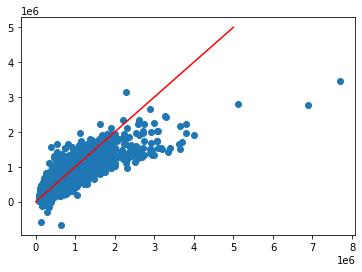

In [17]:
plt.scatter(df_train['price'], y_train_predicted)
plt.plot([0,5*10e5], [0,5*10e5], c='r')

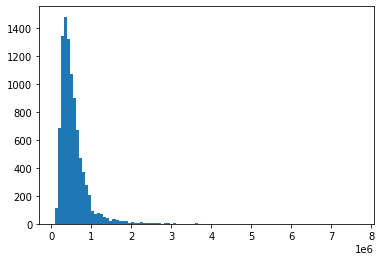

In [18]:
plt.hist(df_train['price'], bins=100);

# FIlter anomalous houses

In [15]:
X_train = df_train.drop(['price', 'date'], axis=1)
X_test = df_test.drop(['price', 'date'], axis=1)

threshold = 1_000_000# df_train['price'].quantile(0.99)

X_train = X_train[df_train['price'] <= threshold]
y_train = df_train[df_train['price'] <= threshold]['price']

X_test = X_test[df_test['price'] <= threshold]
y_test = df_test[df_test['price'] <= threshold]['price']

X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [16]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

y_train_predicted = lr2.predict(X_train)

np.sqrt(((y_train - y_train_predicted)**2).mean())

129315.58658019411

In [17]:
y_train.mean()

468463.86182591185

(array([ 177., 1112., 1800., 1589., 1395., 1001.,  723.,  512.,  374.,
         255.]),
 array([  81000.,  172900.,  264800.,  356700.,  448600.,  540500.,
         632400.,  724300.,  816200.,  908100., 1000000.]),
 <BarContainer object of 10 artists>)

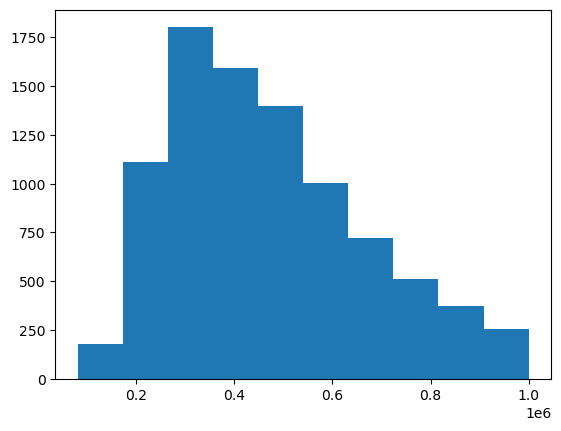

In [18]:
plt.hist(y_train)

### Check if the quality really improved, or its just the method of computing the MSE

In [19]:
X_train = df_train.drop(['price', 'date'], axis=1)
y_train = df_train['price']

X_test = df_test.drop(['price', 'date'], axis=1)
y_test = df_test['price']

X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

np.sqrt(((y_train[df_train['price'] <= threshold] - lr1.predict(X_train[df_train['price'] <= threshold]))**2).mean())


# It did improve!

156496.01010605643

In [20]:
# plt.scatter(y_train, y_train_predicted)

# # plt.plot([0,2*10e4], [0,2*10e4], c='r');
# plt.plot([0,1*10e5], [0,1*10e5], c='r');

# Analyse the remaining data

In [21]:
X_train = df_train.drop(['price'], axis=1)
X_test = df_test.drop(['price'], axis=1)

threshold = 1_000_000# df_train['price'].quantile(0.99)

X_train = X_train[df_train['price'] <= threshold]
y_train = df_train[df_train['price'] <= threshold]['price']

In [22]:
X_train.head(3)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
21162,20141003T000000,4,3.50,3560,6562,2.0,0,0,3,10,3560,0,2014,0,3710,6562
16877,20140805T000000,3,3.25,4610,81935,2.0,0,0,4,9,4610,0,1984,0,2900,43500
16116,20140715T000000,4,1.75,1890,10550,1.0,0,0,5,7,1010,880,1969,0,1930,7291


In [23]:
(X_train['sqft_living'] != X_train['sqft_above'] + X_train['sqft_basement']  ).sum()
# ---> drop sqft_living

0

In [24]:
X_train=X_train.drop('sqft_living', axis=1)
X_test=X_test.drop('sqft_living', axis=1)

In [25]:
# generate how old is the house
# generate years since renovation

In [26]:
def fix_years(df):
    # Fix yr_renovated
    df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

    # Create yr sold
    df['Sold_year'] = df.date.apply(lambda x: int(x[:4]))

    # generate how old is the house
    # generate years since renovation
    df['Years_old'] = df['Sold_year']  - df['yr_built']
    df['Years_since_renov'] = df['Sold_year'] - df['yr_renovated']
    
    return df.drop(['yr_renovated', 'date', 'yr_built', 'Sold_year'], axis=1)

In [27]:
X_train = fix_years(X_train)
X_test = fix_years(X_test)

In [28]:
X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [29]:
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

y_train_predicted = lr3.predict(X_train)

rmse = np.sqrt(((y_train - y_train_predicted)**2).mean())
print(rmse)

129251.23473745803


In [30]:
order = np.argsort(lr3.coef_)

In [31]:
lr3.feature_names_in_

array(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'Years_old', 'Years_since_renov'],
      dtype=object)

In [32]:
for coef, name in zip(lr3.coef_[order], lr3.feature_names_in_[order]):
    print(name, coef)

bedrooms -8716.26862982433
sqft_lot15 -7653.479756980899
Years_since_renov -4730.005260573467
waterfront 5051.325434824231
sqft_lot 6360.255947737587
condition 10270.91965291056
view 10998.958765550324
bathrooms 19165.74219741659
floors 25575.192958506832
sqft_living15 31030.72270486742
sqft_basement 33624.54055212646
sqft_above 37877.88062522512
Years_old 79542.34763792576
grade 90776.54417069464
